# Exploratory Data Analysis for Natural Language  Processing 

In [2]:
## import the necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

In [5]:
## load in the data
data = pd.read_csv("winemag-data-130k-v2.csv", index_col=0)

In [6]:
## check the data
data.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [10]:
## lets check out some information
print("We have {} in this dataset. \n".format(data.shape))
print("There are {} types of wine in this dataset. \n".format(len(data.variety.unique())))
print("There are {} counties producing wine. \n".format(len(data.country.unique())))

We have (129971, 13) in this dataset. 

There are 708 types of wine in this dataset. 

There are 44 counties producing wine. 



### Features for the NLP.
#### Country 
#### description 
#### points

In [11]:
## we only need three features out of this dataset 
data[["country", "description", "points"]].head()

,country,description,points
0,Italy,"Aromas include tropical fruit, broom, brimston...",87
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87
2,US,"Tart and snappy, the flavors of lime flesh and...",87
3,US,"Pineapple rind, lemon pith and orange blossom ...",87
4,US,"Much like the regular bottling from 2012, this...",87


In [12]:
## groupby by country
country = data.groupby("country")
## summary statistics of all countries 
country.describe().head()

points                                                 \
                         count       mean       std   min    25%   50%    75%   
country                                                                         
Argentina               3800.0  86.710263  3.179627  80.0  84.00  87.0  89.00   
Armenia                    2.0  87.500000  0.707107  87.0  87.25  87.5  87.75   
Australia               2329.0  88.580507  2.989900  80.0  87.00  89.0  91.00   
Austria                 3345.0  90.101345  2.499799  82.0  88.00  90.0  92.00   
Bosnia and Herzegovina     2.0  86.500000  2.121320  85.0  85.75  86.5  87.25   

                                price                                     \
                          max   count       mean        std   min    25%   
country                                                                    
Argentina                97.0  3756.0  24.510117  23.430122   4.0  12.00   
Armenia                  88.0     2.0  14.500000   0.707107  14.0  14.25   
Australia               100.0  2294.0  35.437663  49.049458   5.0  15.00   
Austria                  98.0  2799.0  30.762772  27.224797   7.0  18.00   
Bosnia and Herzegovina   88.0     2.0  12.500000   0.707107  12.0  12.25   

                                             
                         50%    75%     max  
country                                      
Argentina               17.0  25.00   230.0  
Armenia                 14.5  14.75    15.0  
Australia               21.0  38.00   850.0  
Austria                 25.0  36.50  1100.0  
Bosnia and Herzegovina  12.5  12.75    13.0

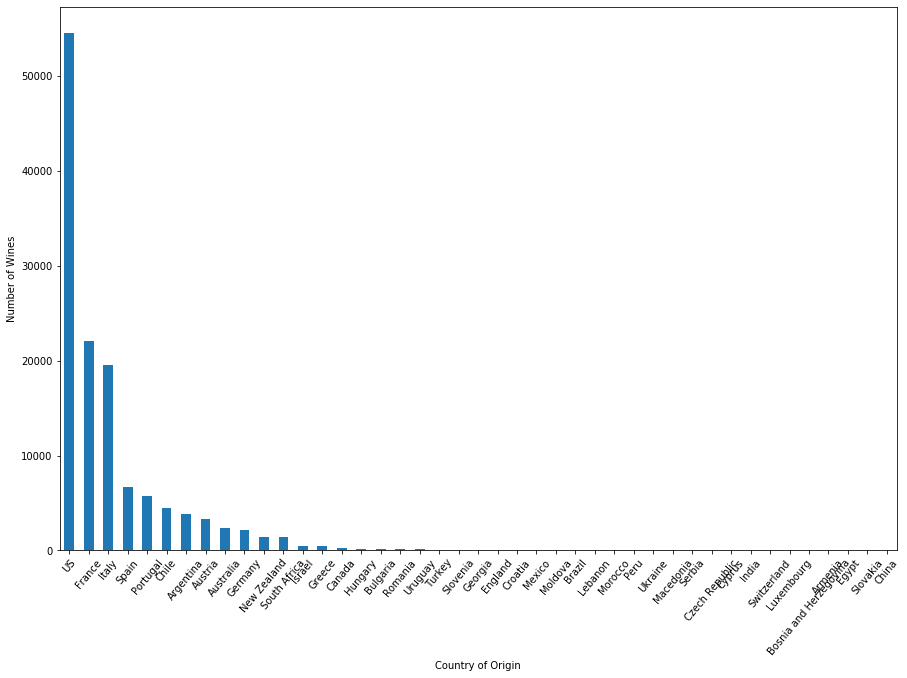

In [13]:
## plot the number of wine
plt.figure(figsize=(15,10))
country.size().sort_values(ascending=False).plot(kind="bar")
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Number of Wines")
plt.show()

In [14]:
?WordCloud
## WordCloud is a technique to show which words are the most frequent among the given text

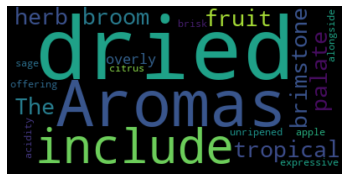

In [21]:
## generate wordcloud with one review 
text = data.description[0]
## create and generate a wordcloud image
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### We can see from the above image that the first review mentioned a lot about dried flavours and aroma of the wine 

In [16]:
## we save the image if we want, using this function 
#wordcloud.to_file("first_review.png")

In [24]:
text = " ".join(review for review in data.description)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 31661073 words in the combination of all review.


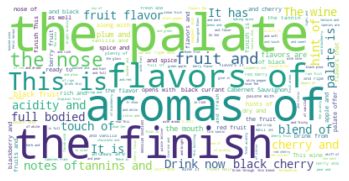

In [25]:
## the bigger view 

## create stopword list
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavour", "flavours"])

## Generate cloud image 
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [26]:
## mask the word cloud
wine_mask = np.array(Image.open("wine_mask.png"))
wine_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

### The way the masking functions works is that it requires all white part of the mask should be 255 not 0 (integer type)

In [27]:
## transform the maask 
def transform_format(val):
    if val == 0:
        return 255 # change the number from 0 to 225
    else:
        return val
               

In [28]:
## transform the mask into a new shape 
transformed_wine_mask = np.ndarray((wine_mask.shape[0], wine_mask.shape[1]))

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

In [29]:
## we should have yhe mask in a correct form now 
transformed_wine_mask

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]])

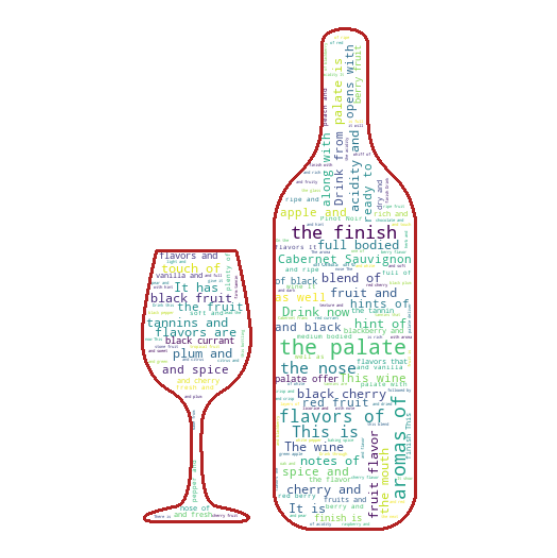

In [32]:
## Create a word cloud image
wordcloud = WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

## Generate a wordcloud
wordcloud.generate(text)

## store to file
wordcloud.to_file("wine_mask.png")

plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [33]:
## Please note that you should save the image after plotting to have the wordcloud with the desired color pattern.
# plt.save("Bottle_wine.png", format="png")

## Arigato :)